## Preprocessing - Reweighing -  Compas Model
- for 'sex' and 'race'

In [1]:
import sys
import os

project_root = os.path.abspath(os.path.join(os.getcwd(), "../.."))
sys.path.insert(0, project_root)

import pandas as pd
from src.data_loading import load_compas_race, load_compas_sex
from src.modeling import reweighing_train_and_predict
from src.metrics import compute_metrics, compare_viz_metrics_2x3, save_agg_metrics, save_raw_metrics
from sklearn.model_selection import StratifiedShuffleSplit

/opt/anaconda3/lib/python3.11/site-packages/inFairness/utils/ndcg.py:37: FutureWarning: We've integrated functorch into PyTorch. As the final step of the integration, `functorch.vmap` is deprecated as of PyTorch 2.0 and will be deleted in a future version of PyTorch >= 2.3. Please use `torch.vmap` instead; see the PyTorch 2.0 release notes and/or the `torch.func` migration guide for more details https://pytorch.org/docs/main/func.migrating.html
  vect_normalized_discounted_cumulative_gain = vmap(
/opt/anaconda3/lib/python3.11/site-packages/inFairness/utils/ndcg.py:48: FutureWarning: We've integrated functorch into PyTorch. As the final step of the integration, `functorch.vmap` is deprecated as of PyTorch 2.0 and will be deleted in a future version of PyTorch >= 2.3. Please use `torch.vmap` instead; see the PyTorch 2.0 release notes and/or the `torch.func` migration guide for more details https://pytorch.org/docs/main/func.migrating.html
  monte_carlo_vect_ndcg = vmap(vect_normalized_di

## Sex

In [2]:
# 1) Retrieve data
protected = 'sex'
privileged_value   = 0.0
unprivileged_value = 1.0

cd, df = load_compas_sex()
feature_cols = [c for c in df.columns if c not in ('label','sex')]

# 2) Set up 25-fold stratified CV
sss = StratifiedShuffleSplit(n_splits=25, test_size=0.2, random_state=42)
results = []

for train_idx, test_idx in sss.split(df, df['label']):
    test_df, y_test, y_pred = reweighing_train_and_predict(
        cd, df,
        train_idx, test_idx,
        protected, privileged_value, unprivileged_value
    )
    m = compute_metrics(
        test_df, y_test, y_pred,
        protected, privileged_value, unprivileged_value
    )
    results.append(m)

# 3) Aggregate results
compas_sex_metrics = pd.DataFrame(results)
compas_sex_metrics_agg = compas_sex_metrics.agg(['mean', 'std'])

In [3]:
compas_sex_metrics_agg

,accuracy,f1_score,SPD,DI,EOD,AOD
mean,0.668080,0.591349,-0.023823,0.937973,-0.004748,0.010818
std,0.010156,0.013591,0.042458,0.114255,0.060376,0.042528


## Race

In [4]:
# 1) Retrieve data
protected = 'race'
privileged_value   = 0.0
unprivileged_value = 1.0

cd, df = load_compas_race()
feature_cols = [c for c in df.columns if c not in ('label','race')]

# 2) Set up 25-fold stratified CV
sss = StratifiedShuffleSplit(n_splits=25, test_size=0.2, random_state=42)
results = []

for train_idx, test_idx in sss.split(df, df['label']):
    test_df, y_test, y_pred = reweighing_train_and_predict(
        cd, df,
        train_idx, test_idx,
        protected, privileged_value, unprivileged_value
    )
    m = compute_metrics(
        test_df, y_test, y_pred,
        protected, privileged_value, unprivileged_value
    )
    results.append(m)

# 3) Aggregate results
compas_race_metrics = pd.DataFrame(results)
compas_race_metrics_agg = compas_race_metrics.agg(['mean', 'std'])

In [5]:
compas_race_metrics_agg

,accuracy,f1_score,SPD,DI,EOD,AOD
mean,0.662647,0.582125,0.025924,1.078250,0.029864,0.049803
std,0.012205,0.014836,0.035788,0.110244,0.038988,0.032704


---------------------------------
## compare with baseline, create plots

In [6]:
baseline_race_agg = pd.read_csv('../../reports/baseline_agg/compas_race_metrics_agg.csv', index_col=0)
baseline_sex_agg = pd.read_csv('../../reports/baseline_agg/compas_sex_metrics_agg.csv', index_col=0)

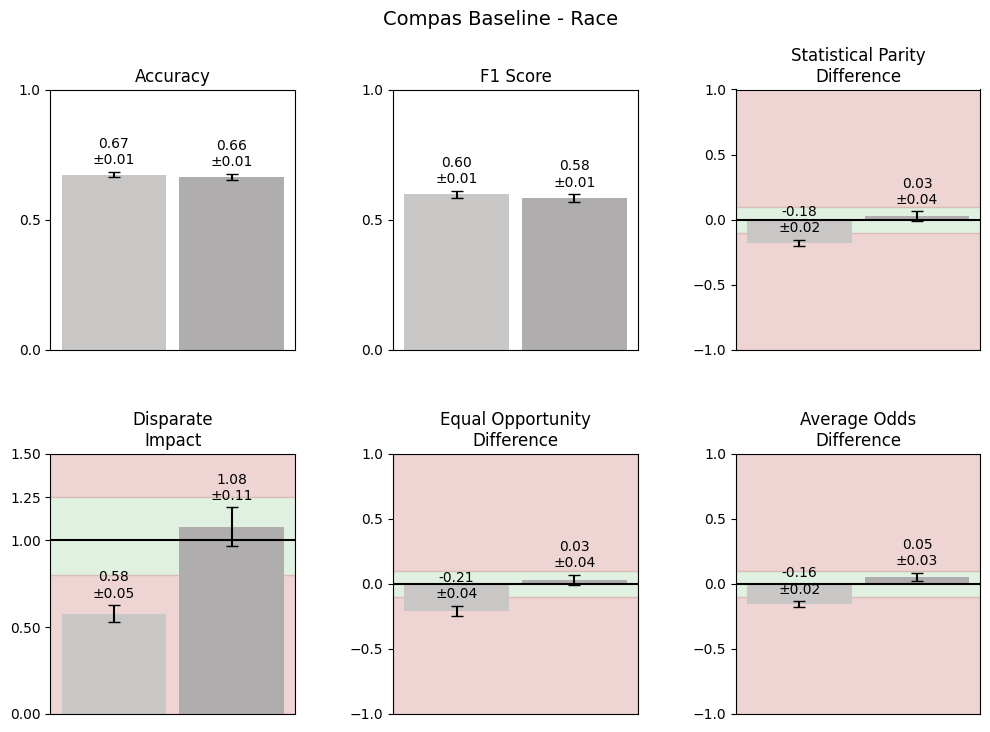

In [7]:
compare_viz_metrics_2x3(baseline_race_agg, compas_race_metrics_agg, 'Baseline', 'Race', 'Compas Baseline - Race')

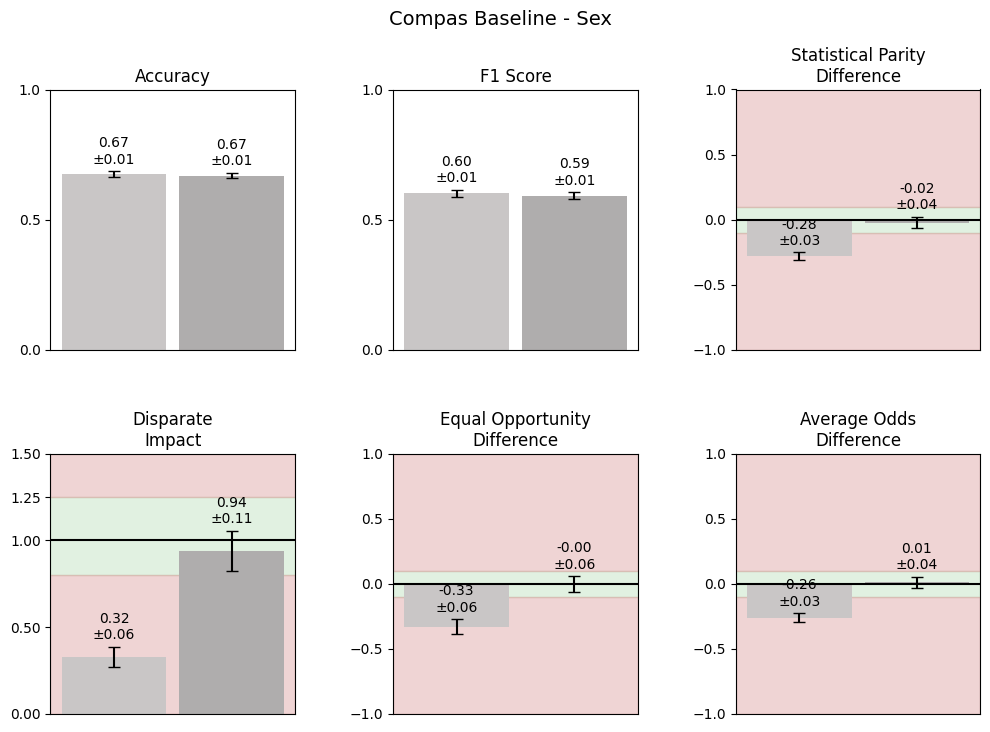

In [8]:
compare_viz_metrics_2x3(baseline_sex_agg, compas_sex_metrics_agg, 'Baseline', 'Sex', 'Compas Baseline - Sex')

In [9]:
save_agg_metrics('compas', 'reweighing', compas_race_metrics_agg, compas_sex_metrics_agg)
save_raw_metrics('compas', 'reweighing', compas_race_metrics, compas_sex_metrics)